Imports

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp 
import numpy as np
import cv2
import os
from utils import get_landmarks

Data Preprocessing and Preparation

In [33]:
df=pd.read_csv('data.csv')
df.head(10)

,Unnamed: 0,path,label
0,0,Surprise/1bd930d6a1c717c11be33db74823f661cb53f...,Surprise
1,1,Surprise/cropped_emotions.100096~12fffff.png,Surprise
2,2,Surprise/0df0e470e33093f5b72a8197fa209d684032c...,Surprise
3,3,Surprise/cropped_emotions.260779~12fffff.png,Surprise
4,4,Surprise/cropped_emotions.263616~12fffff.png,Surprise
5,5,Surprise/cropped_emotions.263141~12fffff.png,Surprise
6,6,Surprise/1c16775dfd679b09c10f4e94f1ea187a921f5...,Surprise
7,7,Surprise/0a15c44d8be6cc71cd9d8ab595266e5147459...,Surprise
8,8,Surprise/cropped_emotions.100252~12fffff.png,Surprise
9,9,Surprise/cropped_emotions.263517~12fffff.png,Surprise


In [34]:
print(df.info())
print("Checking for Null values:\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15453 entries, 0 to 15452
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15453 non-null  int64 
 1   path        15453 non-null  object
 2   label       15453 non-null  object
dtypes: int64(1), object(2)
memory usage: 362.3+ KB
None
Checking for Null values:
 Unnamed: 0    0
path          0
label         0
dtype: int64


In [35]:
#Check if all are the Unnamed:0 column values are unique
print(df.shape)
print(len(df['Unnamed: 0'].unique()))
#Drop the Unnamed column since we alreadyhave the index column
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

(15453, 3)
15453


,path,label
0,Surprise/1bd930d6a1c717c11be33db74823f661cb53f...,Surprise
1,Surprise/cropped_emotions.100096~12fffff.png,Surprise
2,Surprise/0df0e470e33093f5b72a8197fa209d684032c...,Surprise
3,Surprise/cropped_emotions.260779~12fffff.png,Surprise
4,Surprise/cropped_emotions.263616~12fffff.png,Surprise


In [36]:
df['label'].value_counts()

label
Neutral     4027
Sad         3934
Happy       3740
Angry       1313
Surprise    1234
Ahegao      1205
Name: count, dtype: int64

In [37]:
#Removing few class labels for moderation purposes
df=df[df['label']!='Neutral']
df=df[df['label']!='Ahegao']
df.shape

(10221, 2)

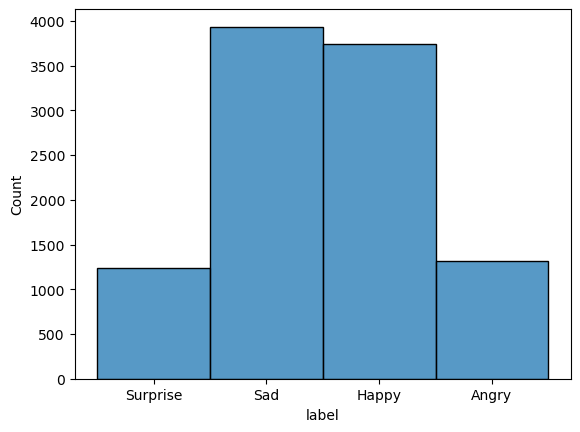

In [38]:
import seaborn as sns
sns.histplot(data=df,x=df['label'])
plt.show()

In [ ]:
#Basic features for training data

landmark_data=[]
dataset_dir_path=r"D:\emotion_dataset\dataset"
for emotion_labels in os.listdir(dataset_dir_path):
    for img_path in os.listdir(os.path.join(dataset_dir_path,emotion_labels)):
        full_img_path=os.path.join(dataset_dir_path,emotion_labels,img_path)
        img=cv2.imread(full_img_path)
        img_landmarks=get_landmarks(img)
        if img_landmarks and len(img_landmarks) == 1434:   
            landmark_data.append([img_path]+img_landmarks+[emotion_labels])
        elif img_landmarks and len(img_landmarks) !=1434:
            print(full_img_path,len(img_landmarks))

In [ ]:
#Landmark features
columns=["File"]
for i in range(478):
    columns=columns+[f"x{i}"]+[f"y{i}"]+[f"z{i}"]
columns=columns+["Emotion_Label"]    
data=pd.DataFrame(data=landmark_data,columns=columns)

In [43]:
data.head()

,File,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,x475,y475,z475,x476,y476,z476,x477,y477,z477,Emotion_Label
0,00a7cb9cf18d3a015a9e932952f942fd4bcad8044bcef5...,0.462853,0.703957,-0.063871,0.435659,0.596392,-0.137474,0.455995,0.625306,-0.070197,...,0.629235,0.404544,-0.045084,0.609650,0.420665,-0.045084,0.623387,0.444919,-0.045084,Angry
1,00b7e4551ffa57ff4e2311b2ce156a6c964c642abcacff...,0.508222,0.686624,-0.083488,0.500030,0.595476,-0.149186,0.500274,0.622715,-0.080414,...,0.644312,0.372752,0.024835,0.618640,0.398970,0.024835,0.646608,0.424549,0.024835,Angry
2,0118d3f7d8cbda624679c102f3a09282a7a73018d6fcd1...,0.509734,0.693084,-0.087336,0.482070,0.598624,-0.144905,0.498920,0.631458,-0.081799,...,0.622521,0.381526,0.006120,0.604547,0.401713,0.006120,0.623848,0.423134,0.006120,Angry
3,016e982434c5ffc7ee2fdc353befd030a420183dcb9b32...,0.498339,0.678165,-0.099707,0.516150,0.572861,-0.153686,0.509856,0.605556,-0.088777,...,0.654815,0.423852,0.043983,0.624069,0.439265,0.043983,0.646687,0.465086,0.043983,Angry
4,01b4484e9f51114bbdaceb1e6b3d00f2708dc04831f051...,0.517820,0.715426,-0.058513,0.517744,0.649572,-0.139796,0.519360,0.667633,-0.065651,...,0.635671,0.402298,-0.004279,0.612029,0.427482,-0.004279,0.641158,0.446615,-0.004279,Angry


In [ ]:
data.to_csv("landmark_data.csv", index=False)  # Save the prepared data